In [5]:
import h5py
import numpy as np
import pandas as pd
import anndata as ad
from scipy.sparse import csr_matrix
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import gseapy as gp
import os
import mygene
print(ad.__version__)

0.11.4


In [6]:
# Let's load the file using anndata's read_h5ad function
adata = ad.read_h5ad("f9986ff4-66fc-4265-8124-806f0c6313df.h5ad")

In [7]:
# Print basic information about the dataset
print(f"AnnData object with n_obs × n_vars = {adata.n_obs} × {adata.n_vars}")

# The number of genes (variables) is:
print(f"Number of genes: {adata.n_vars}")

# You can also view the first few gene names
print("\nFirst 10 gene names:")
print(adata.var_names[:10])

# show the first 10 ensembl IDs + their matching symbols
display(adata.var[['gene_symbols','feature_name']].head(10))

AnnData object with n_obs × n_vars = 147523 × 32034
Number of genes: 32034

First 10 gene names:
Index(['ENSMUSG00000109644', 'ENSMUSG00000108652', 'ENSMUSG00000007777',
       'ENSMUSG00000086714', 'ENSMUSG00000043644', 'ENSMUSG00000042208',
       'ENSMUSG00000020831', 'ENSMUSG00000089755', 'ENSMUSG00000107002',
       'ENSMUSG00000046683'],
      dtype='object')


,gene_symbols,feature_name
ENSMUSG00000109644,0610005C13Rik,0610005C13Rik
ENSMUSG00000108652,0610006L08Rik,0610006L08Rik
ENSMUSG00000007777,0610009B22Rik,0610009B22Rik
ENSMUSG00000086714,0610009E02Rik,0610009E02Rik
ENSMUSG00000043644,0610009L18Rik,0610009L18Rik
ENSMUSG00000042208,0610010F05Rik,Sanbr_ENSMUSG00000042208
ENSMUSG00000020831,0610010K14Rik,0610010K14Rik
ENSMUSG00000089755,0610012D04Rik,0610012D04Rik
ENSMUSG00000107002,0610012G03Rik,Ncbp2as2_ENSMUSG00000107002
ENSMUSG00000046683,0610025J13Rik,0610025J13Rik


In [8]:
# general information about the dataset
adata

AnnData object with n_obs × n_vars = 147523 × 32034
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'pANN', 'sampleid', 'age', 'gender', 'reference', 'accession', 'sample_note', 'subclass_label', 'author_cell_type', 'development_stage_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'tissue_type', 'library_platform', 'cell_type_ontology_term_id', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'gene_symbols', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_scVI', 'X_umap'

In [9]:
adata.obs[['sampleid', 'cell_type', 'nCount_RNA', 'nFeature_RNA']].head()

,sampleid,cell_type,nCount_RNA,nFeature_RNA
10x3_Ms_WT_P14_AAACCCAAGGGATCTG-1,10x3_Ms_WT_P14,rod bipolar cell,8090.0,3062.0
10x3_Ms_WT_P14_AAACCCACATGGATCT-1,10x3_Ms_WT_P14,rod bipolar cell,8397.0,3145.0
10x3_Ms_WT_P14_AAACGAAAGACTCTAC-1,10x3_Ms_WT_P14,type 6 cone bipolar cell (sensu Mus),8939.0,3308.0
10x3_Ms_WT_P14_AAACGAACAATGTTGC-1,10x3_Ms_WT_P14,type 5a cone bipolar cell,11519.0,4073.0
10x3_Ms_WT_P14_AAAGAACGTTAAACAG-1,10x3_Ms_WT_P14,type 3b cone bipolar cell,7161.0,2976.0


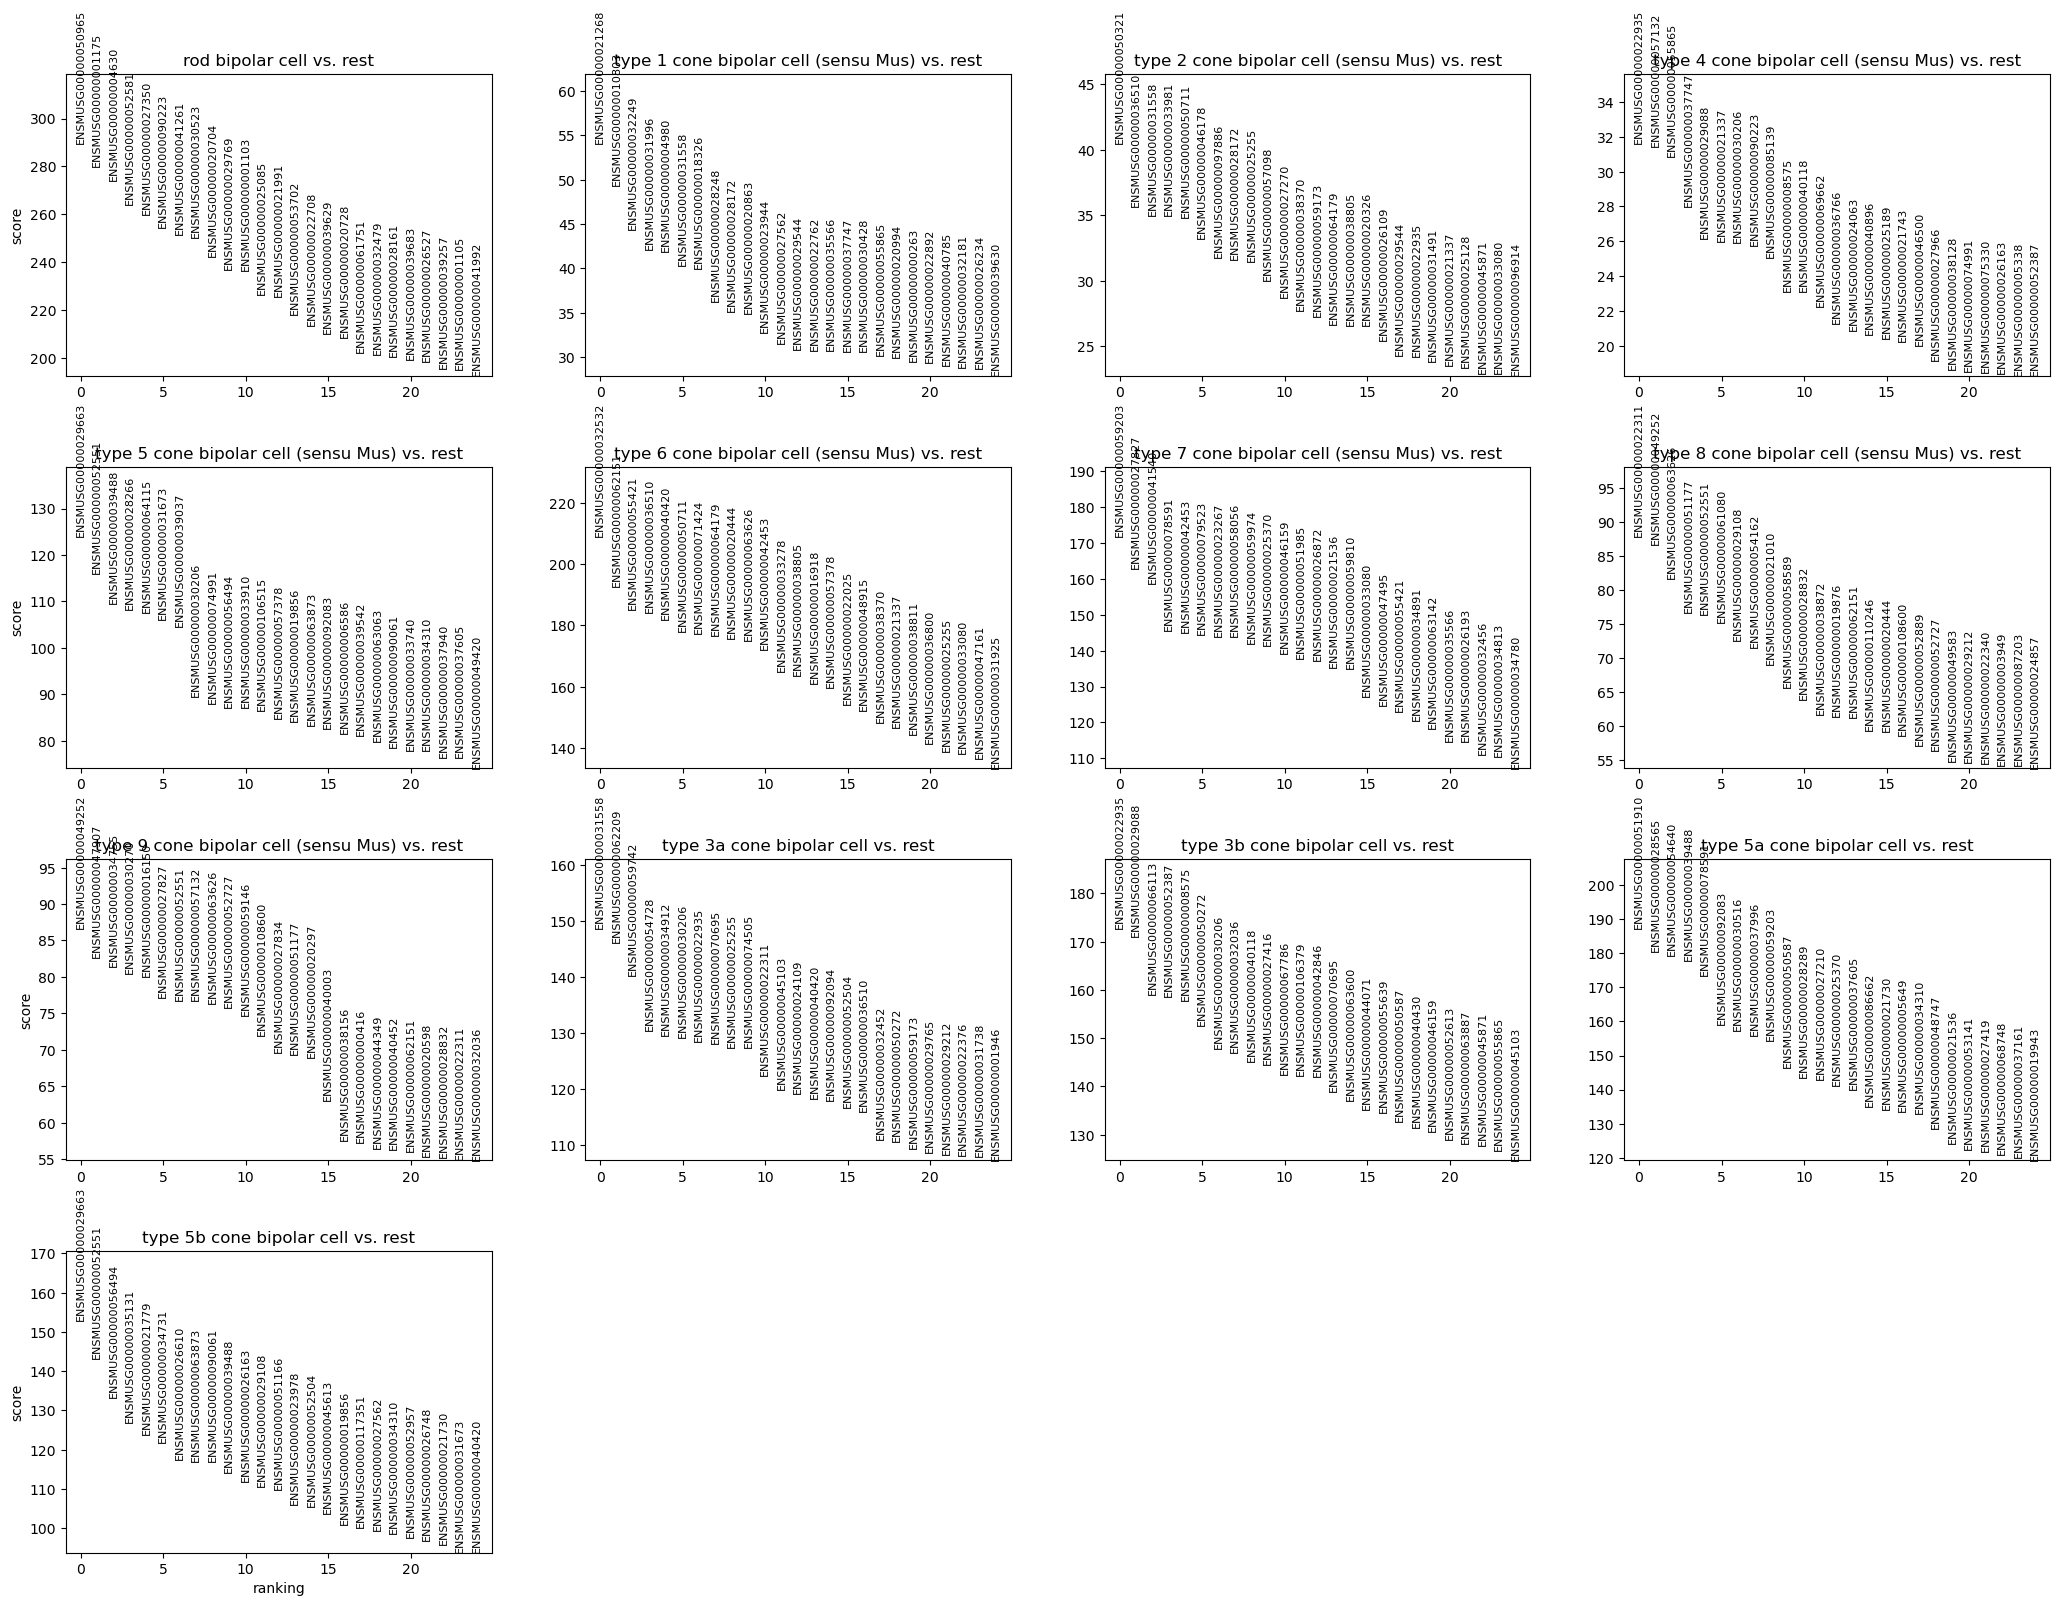

In [10]:
# DEA
sc.tl.rank_genes_groups(
    adata,
    groupby='cell_type',         
    method='wilcoxon',          
    use_raw=False           
)

sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False) 

In [11]:
# Get the DEA result from adata
result = adata.uns["rank_genes_groups"]
groups = result["names"].dtype.names

# For each group, save top genes to CSV
for group in groups:
    df = pd.DataFrame({
        "gene": result["names"][group],
        "logfoldchange": result["logfoldchanges"][group],
        "pval": result["pvals"][group],
        "pval_adj": result["pvals_adj"][group],
        "score": result["scores"][group],
    })
    
    # Save to CSV
    df.to_csv(f"dea_results/{group}_vs_rest.csv", index=False)

In [ ]:
# just doing rod bipolar cell for now
target_group = 'rod bipolar cell'

rnk = pd.DataFrame({
    'gene': result['names'][target_group],
    'score': result['logfoldchanges'][target_group]
})

rnk = rnk.dropna().sort_values('score', ascending=False)

In [20]:
# ensembl to gene symbol

# mg = mygene.MyGeneInfo()

# # List of Ensembl IDs from your DEA
# ensembl_ids = list(rnk['gene'])

# # Query MyGene for symbol mappings
# query = mg.querymany(ensembl_ids, scopes='ensembl.gene', fields='symbol', species='mouse')

# # Build lookup map
# symbol_map = {item['query']: item.get('symbol', None) for item in query}

# # Apply mapping to your ranked list
# rnk['gene_symbol'] = rnk['gene'].map(symbol_map)

# # Drop unmapped entries
# rnk = rnk.dropna(subset=['gene_symbol']).drop_duplicates(subset=['gene_symbol'])

# # Final ranked file with gene symbols
# rnk = rnk[['gene_symbol', 'score']].rename(columns={'gene_symbol': 'gene'})